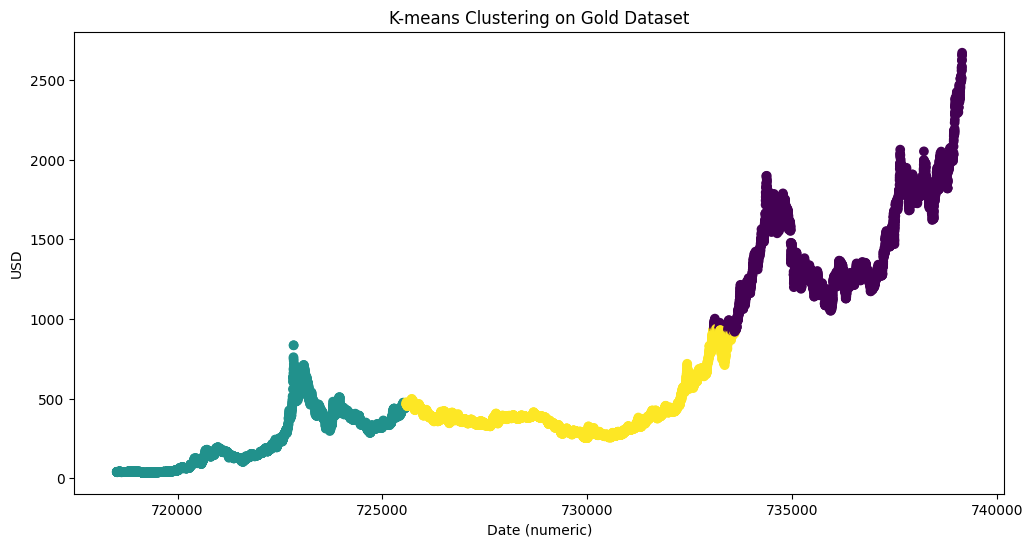

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_excel('Analysis 3.xlsx')

# Convert 'Date' to datetime format and then to a numerical format (e.g., ordinal)
data['Date'] = pd.to_datetime(data['Date'])
data['Date_numeric'] = data['Date'].apply(lambda x: x.toordinal())

# Use only the 'Date_numeric' and 'USD' columns for clustering
X = data[['Date_numeric', 'USD']]

# Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters (e.g., 3)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Plot the results
plt.figure(figsize=(12,6))
plt.scatter(data['Date_numeric'], data['USD'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Date (numeric)')
plt.ylabel('USD')
plt.title('K-means Clustering on Gold Dataset')
plt.show()


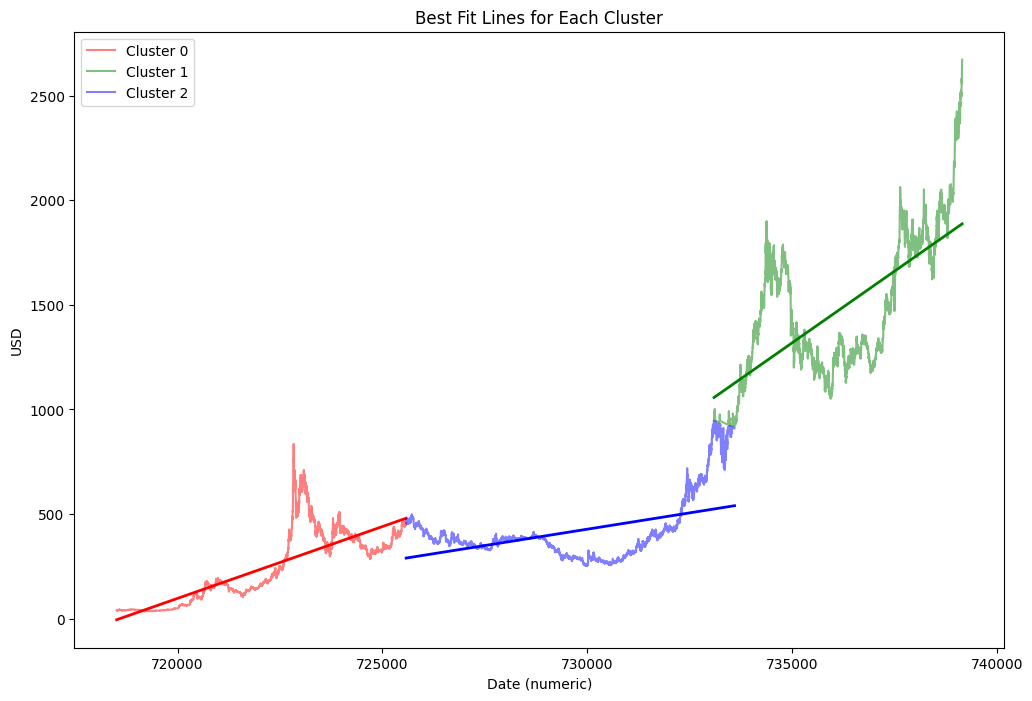

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset
data = pd.read_excel('Analysis 3.xlsx')

# Convert 'Date' to datetime format and then to a numerical format (e.g., ordinal)
data['Date'] = pd.to_datetime(data['Date'])
data['Date_numeric'] = data['Date'].apply(lambda x: x.toordinal())

# Use only the 'Date_numeric' and 'USD' columns for clustering
X = data[['Date_numeric', 'USD']]

# Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters (e.g., 3)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Plot the results and fit a best fit line for each cluster
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']  # Colors for each cluster

for cluster in range(kmeans.n_clusters):
    # Filter data points for the current cluster
    cluster_data = data[data['Cluster'] == cluster]
    
    # Fit a linear regression model
    model = LinearRegression()
    X_cluster = cluster_data['Date_numeric'].values.reshape(-1, 1)
    y_cluster = cluster_data['USD'].values
    model.fit(X_cluster, y_cluster)
    
    # Predict to draw the best fit line
    line_x = np.linspace(X_cluster.min(), X_cluster.max(), 100).reshape(-1, 1)
    line_y = model.predict(line_x)
    
    # Scatter plot of the cluster points
    plt.plot(cluster_data['Date_numeric'], cluster_data['USD'], color=colors[cluster], label=f'Cluster {cluster}', alpha=0.5)
    
    # Plot the best fit line
    plt.plot(line_x, line_y, color=colors[cluster], linewidth=2)

plt.xlabel('Date (numeric)')
plt.ylabel('USD')
plt.title('Best Fit Lines for Each Cluster')
plt.legend()
plt.show()


In [22]:
data

,Date,USD,Date_numeric,Cluster
0,1968-03-22,40.0000,718513,1
1,1968-03-25,40.2500,718516,1
2,1968-03-26,41.1000,718517,1
3,1968-03-27,40.3500,718518,1
4,1968-03-28,39.6000,718519,1
...,...,...,...,...
14231,2024-09-20,2621.9568,739149,0
14232,2024-09-23,2628.3987,739152,0
14233,2024-09-24,2656.6992,739153,0
14234,2024-09-25,2656.8210,739154,0


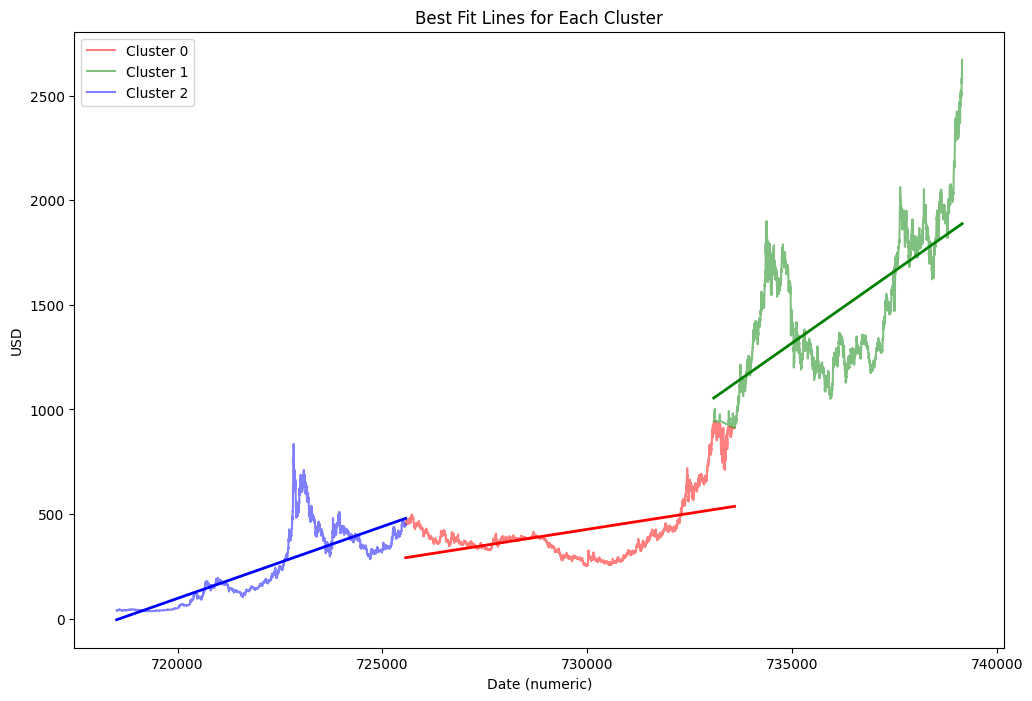

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_excel('Analysis 3.xlsx')

# Convert 'Date' to datetime format and then to a numerical format (e.g., ordinal)
data['Date'] = pd.to_datetime(data['Date'])
data['Date_numeric'] = data['Date'].apply(lambda x: x.toordinal())

# Use only the 'Date_numeric' and 'USD' columns for clustering
X = data[['Date_numeric', 'USD']]

# Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters (e.g., 3)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Plot the results and fit a best fit line for each cluster
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']  # Colors for each cluster

for cluster in range(kmeans.n_clusters):
    # Filter data points for the current cluster
    cluster_data = data[data['Cluster'] == cluster]
    
    # Fit a linear regression model
    model = LinearRegression()
    X_cluster = cluster_data['Date_numeric'].values.reshape(-1, 1)
    y_cluster = cluster_data['USD'].values
    model.fit(X_cluster, y_cluster)
    
    # Predict to draw the best fit line
    line_x = np.linspace(X_cluster.min(), X_cluster.max(), 100).reshape(-1, 1)
    line_y = model.predict(line_x)
    
    # Scatter plot of the cluster points
    plt.plot(cluster_data['Date_numeric'], cluster_data['USD'], color=colors[cluster], label=f'Cluster {cluster}', alpha=0.5)
    
    # Plot the best fit line
    plt.plot(line_x, line_y, color=colors[cluster], linewidth=2)

plt.xlabel('Date (numeric)')
plt.ylabel('USD')
plt.title('Best Fit Lines for Each Cluster')
plt.legend()
plt.show()

In [2]:
data.head()

,Date,USD,Date_numeric,Cluster
0,1968-03-22,40.00,718513,2
1,1968-03-25,40.25,718516,2
2,1968-03-26,41.10,718517,2
3,1968-03-27,40.35,718518,2
4,1968-03-28,39.60,718519,2
